# Neural network and data with fractional dimension

The purpose of this notebook is to investigate how much neural networks can recognize data sets having "fractional" dimension.

To simulate such a dataset, we first write a program which will generate the Koch snowflake, a well-known fractal with fractional (Hausdorff) dimension. The output of the function are the (x,y) coordinates of points of the Koch snowflake.  Since fractals are limiting objects, we will use the $n$-th approximation of the Koch snowflake $K_n$, i.e. the program outputs the vertices of $K_n$.

In [1]:
import math as math  
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd


## Part I: Generating the fractals (Koch snowflake)

In [2]:
# Defines a point to be an x and y coordinate.
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    # Returns a string representing the point.
    def toString(self):
        return("(" + str(self.x) + ", " + str(self.y) + ")")

In [3]:
# Defines a line to be a pair of Point objects.
# p1/p2 should be the first/last point when traversing from left

class Line:
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2
     
    # Returns the length of the line.
    def length(self):
        x1 = self.p1.x
        x2 = self.p2.x
        y1 = self.p1.y
        y2 = self.p2.y
        length = math.sqrt((x1-x2)**2 + (y1-y2)**2)
        return(length)
    
    # Returns the slope of the line.
    def slope(self):
        m = (self.p1.y - self.p2.y)/(self.p1.x - self.p2.x)
        return(m)
    
    # Returns the "bottom" point we will need to "Koch" the line. 
    def getTopPoint(self, a):
        p1 = self.p1  # Gets the first endpoint of the line.
        p2 = self.p2  # Gets the other endpoint of the line.
        
        w = abs(p2.x-p1.x)  # Width of big triangle.
        h = abs(p2.y-p1.y)  # Height of big triangle.
        l = self.length() # Length of line.
        t = l*a  # Length of line we are removing.
        s = h*(l-t)/(2*l) # Vertical unkown distance.
        r = w*(l-t)/(2*l) # Horizontal unkown distance.

        # Determines the top point depending on the slope of the line.
        if(self.slope() >= 0):
            xCoord = max(p1.x, p2.x) - r
            yCoord = max(p1.y, p2.y) - s
        else:
            xCoord = min(p1.x, p2.x) + r
            yCoord = max(p1.y, p2.y) - s
        
        point = Point(xCoord, yCoord)
        return(point)
    # Returns the "bottom" point we will need to "Koch" the line.
    def getBottomPoint(self, a):
        p1 = self.p1  # Gets the first endpoint of the line.
        p2 = self.p2  # Gets the last endpoint of the line.
        
        w = abs(p2.x-p1.x)  # Width of big triangle.
        h = abs(p2.y-p1.y)  # Height of big triangle.
        l = self.length()  # Length of line.
        t = l*a  # Length of line we are removing.
        s = h*(l-t)/(2*l) # Vertical unkown distance.
        r = w*(l-t)/(2*l) # Horizontal unkown distance
        
        # Determines the bottom point depending on the slope of the line.
        if(self.slope() >= 0):
            xCoord = min(p1.x, p2.x) + r
            yCoord = min(p1.y, p2.y) + s 
        else:
            xCoord = max(p1.x, p2.x) - r
            yCoord = min(p1.y, p2.y) + s
            
        point = Point(xCoord, yCoord)
        return(point)
    
    # Returns the point that is the tip of the isoceles triangle when trying to "Koch" the line.
    def getKochPoint(self, a):
        topPoint = self.getTopPoint(a)  # Gets top point.
        bottomPoint = self.getBottomPoint(a)  # Gets bottom point.
        h = abs(topPoint.y - bottomPoint.y)  # Vertical distance between top point and bottom point.
        w = abs(topPoint.x - bottomPoint.x)
        l = self.length() # Length of the line.
        t = l*a # Length of the part we removed.
     
        # Calculates the angles we need.                                  
        alpha = math.atan(h/w)
        beta = math.acos(t/(l-t))
        gamma = math.pi - alpha - beta
        
        # Caluclates the horizontal and vertical distances (respectfully) from the bottomPoint's 
        # coordinates to the desired Koch point's coordinates. 
        r = ((l-t)/2)*math.cos(gamma)
        s = ((l-t)/2)*math.sin(gamma)
        
        # Depending on the slope of the line, the coordinates of the Koch point will be
        # different.
        if(self.slope() >= 0):
            xCoord = bottomPoint.x - r
            yCoord = bottomPoint.y + s
        else:
            xCoord = bottomPoint.x + r
            yCoord = bottomPoint.y + s
                                          
        point = Point(xCoord, yCoord)                               
        return(point)
    
    # Returns the point that is the tip of the isoceles triangle when trying to "Koch" the line.
    def altGetKochPoint(self, a):
        topPoint = self.getTopPoint(a)  # Gets top point.
        bottomPoint = self.getBottomPoint(a)  # Gets bottom point.
        h = abs(topPoint.y - bottomPoint.y)  # Vertical distance between top point and bottom point.
        w = abs(topPoint.x - bottomPoint.x)
        l = self.length() # Length of the line.
        t = l*a # Length of the part we removed.
     
        # Calculates the angles we need.                                  
        alpha = math.atan(h/w)
        beta = math.acos(t/(l-t))
        gamma = math.pi - alpha - beta
        
        # Caluclates the horizontal and vertical distances (respectfully) from the bottomPoint's 
        # coordinates to the desired Koch point's coordinates. 
        r = ((l-t)/2)*math.cos(gamma)
        s = ((l-t)/2)*math.sin(gamma)
        
        # Depending on the slope of the line, the coordinates of the Koch point will be
        # different.
        if(self.slope() >= 0):
            xCoord = topPoint.x + r
            yCoord = topPoint.y - s
        else:
            xCoord = topPoint.x - r
            yCoord = topPoint.y - s
                                          
        point = Point(xCoord, yCoord)                               
        return(point)
    
    # Returns a list of lines that results from performing 1 step in the Koch curve construction.
    def kochLine(self, a, k):
        topPoint = self.getTopPoint(a)  # Gets top point.
        bottomPoint = self.getBottomPoint(a)  # Gets bottom point.
       
        if(k == 0):
            kochPoint = self.getKochPoint(a)  # Gets Koch point.
        else:
            kochPoint = self.altGetKochPoint(a)
                
        p1 = self.p1  # Gets first endpoint of line.
        p2 = self.p2  # Gets other endpoint of line.
        
        # I want these lines from left to right, and the order depends on the slope of the line.
        # Constructs the 4 lines we want.
        if(self.slope() >= 0):
            line1 = Line(p1, bottomPoint)
            line2 = Line(bottomPoint, kochPoint)
            line3 = Line(kochPoint, topPoint)
            line4 = Line(topPoint, p2)
        else:
            line1 = Line(p1, topPoint)
            line2 = Line(topPoint, kochPoint)
            line3 = Line(kochPoint, bottomPoint)
            line4 = Line(bottomPoint, p2)
        
        # Returns the 4 new lines we get from Koching the original line.
        lineList = [line1, line2, line3, line4]
        return(lineList)
    
    # Returns a string that represents the line.
    def toString(self):
        print("Line = " + "(" + self.p1.toString() + ", " + self.p2.toString() + ")")
    
    # Plots the line on a set of axes.    
    def show(self):
        xVals = [self.p1.x, self.p2.x]
        yVals = [self.p1.y, self.p2.y]
        plt.plot(xVals, yVals)



In [4]:
# Defines a Curve to be a list of Line objects.
class Curve:
    def __init__(self, lineList):
        self.lineList = lineList;
     
    # Plots the Curve on a set of axes.
    def show(self):
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111)
        plt.xlim(-0.5, 1.5)
        plt.ylim(-0.25, 1)
        ax.set_aspect('equal', adjustable='box')
        for i in range(len(self.lineList)):
            self.lineList[i].show()
            


In [5]:
# Recursively constructs the Koch curve from previous iterations. 'a' is the fraction of the base line you want
# to remove in each step. 'n' is the number of iterations, and 'lineList' is a list of lines.
def kochCurve(a, n, lineList):
    if(n == 0):
        return(lineList)
    else:
        newList = []
        ## Fix
        for line in lineList:
            if(line.p1.x > line.p2.x and line.slope() < 0):
                altLine = Line(line.p2, line.p1)
                newList = newList + altLine.kochLine(a, 1)
            elif(line.p1.x > line.p2.x and line.slope() >= 0):
                altLine = Line(line.p2, line.p1)
                newList = newList + altLine.kochLine(a, 1)
            elif(line.p1.x <= line.p2.x and line.slope() < 0):
                newList = newList + line.kochLine(a, 0)
            elif(line.p1.x <= line.p2.x and line.slope() >= 0):    
                newList = newList + line.kochLine(a, 0)
        return(kochCurve(a, n-1, newList))


In [6]:
def getXCoordinates(lineList):
    xList = []
    for line in lineList:
        xList.append(line.p1.x)
        xList.append(line.p2.x)
    xNumPy = np.array(xList)
    return(xNumPy)

def getYCoordinates(lineList):
    yList = []
    for line in lineList:
        yList.append(line.p1.y)
        yList.append(line.p2.y)
    yNumPy = np.array(yList)
    return(yNumPy)

In [7]:
def get_koch_coordinates(proportion_taken_out, num_of_iterate):
    p1 = Point(0,0)
    p2 = Point(1,0)
    baseLine = Line(p1, p2)


    baseList = [baseLine]
    curveList = kochCurve(proportion_taken_out,
                          num_of_iterate, 
                          baseList)
    curve = Curve(curveList)
    curve.show()


    npx = getXCoordinates(curveList)
    npy = getYCoordinates(curveList)

    return npx, npy


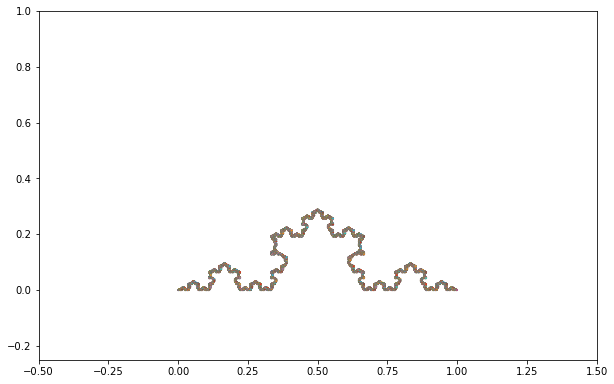

In [35]:
x_coord, y_coord = get_koch_coordinates(1/3, 8)

## Part II: Data preparation

We will use the program above to prepare a dataset to feed into a neural network.
The output of the above program are the x, y coordinates of the points lying on the Koch snowflake. We will manually assign them label "1".

In [36]:
x_coord = x_coord.reshape((len(x1), 1))
y_coord = y_coord.reshape((len(y1), 1))

# combine the x, y coordinates as two side-by-side columns
X1 = np.hstack((x_coord, y_coord))

# manually assign label 1 to these points (since they're on the curve)
y1 = np.array([1 for point in X1])

In [38]:
len(X1)

131072

The program above outputs a plot of the $n$-th Koch snowflake by interpolating the vertices. Here we define the function __plot__ which only plots the vertices themselves as a scatterplot. This will be useful later when we interpret the output of a neural network.

In [43]:
def plot(x_left_lim,    x_right_lim,
         y_bottom_lim,  y_top_lim,
         fig_size_w,    fig_size_h,
         x_arr,         y_arr):



    plt.figure(figsize=(fig_size_w, fig_size_h))

    plt.xlim(x_left_lim,   x_right_lim)
    plt.ylim(y_bottom_lim, y_top_lim)


    plt.scatter(x_arr, y_arr, s=0.0001)
    plt.show()

For example, we plot the vertices of $K_n$, obtained from the above program. This time we do not interpolate the points, and only do a scatterplot of the vertices.

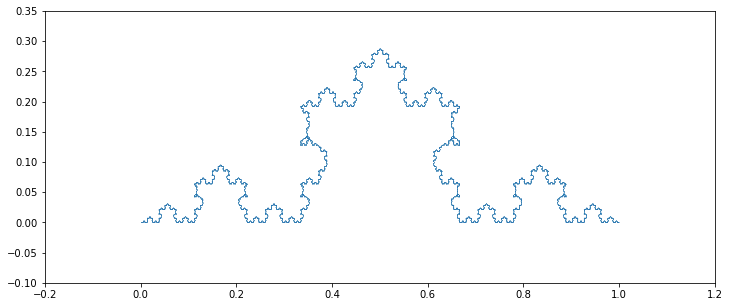

In [44]:
plot(-0.2,    1.2, 
     -0.1,    0.35,
     12,      5,
     X1[:,0], X1[:,1])

We already have the points on the snowflake labelled as 1. To train a classifier we also need points with labelled 0, indicating they are not on the snowflake. 

We do this by first creating a list of evenly spaced points along the $x$-axis, and similarly for the $y$-axis. Then we make the Cartesian product of the two arrays to create a list of square lattice points on the plane. These points will be labelled 0.

For the points that are close enough to the snowflake, it is possible that the label really should be 1, but we will ignore this for now.

In [45]:
def make_K_complement(x_left_lim,      x_right_lim,
                      y_top_lim,       y_bottom_lim,
                      x_num_of_points, y_num_of_points):


    # create the x, y coordinates
    # x in [x_left_lim, x_right_lim], y in [y_bottom_lim, y_top_lim].
    x_coord_train = np.linspace(x_left_lim, x_right_lim,  x_num_of_points)
    y_coord_train = np.linspace(y_top_lim,  y_bottom_lim, y_num_of_points)


    # create the Cartesian product of x_coord_train, y_coord_train
    X0 = np.transpose([np.tile(x_coord_train, len(y_coord_train)), np.repeat(y_coord_train, len(x_coord_train))])
    y0 = np.array([0 for point in X0])

    return X0, y0


In [46]:
X0, y0 = make_K_complement(-0.1, 1.1,
                           0.35, -0.1,
                           400*3, 400*2)

In [47]:
len(X0)

960000

Now we have two sets of data: 

 - X0, y0
 - X1, y1

corresponding to points on the Koch snowflake and those that are not. 
We will combine the two as a single dataset, then shuffle the index of the data points before doing a train_test_split.

The reason we shuffle the index is because as we concatenate the two datasets, the data with label 1 are at the top, and the those with label 0 are in the bottom.

In [48]:
# X_train contains 2 cols: x, y coordinates of the points
# y_train is the corresponding label (0,1)

X = np.concatenate((X0, X1), axis=0)
y = np.concatenate((y0, y1), axis=0)


# randomize the index
idx = np.random.permutation(len(X))
X, y = X[idx], y[idx]


# check to make sure X, y have the right dimension
print(X.shape)
print(y.shape)

(1091072, 2)
(1091072,)


In [49]:
# make sure labels are shuffled, so we don't have all 0's then all 1's.
y_list = y.tolist()

y_list[-10:]

[0, 1, 0, 0, 0, 0, 0, 0, 0, 1]

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

## Part III: Feeding the data to a neural network

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical


Create our neural network.

In [52]:
def create_model(X_train, y_train,
                 no_of_hidden_layers,
                 hidden_activation,
                 epochs, 
                 batch_size):

    model = Sequential()
    model.add(Dense(units=2,activation=hidden_activation))
    
    for i in range(no_of_hidden_layers):
        model.add(Dense(units=(no_of_hidden_layers-i)*2,activation=hidden_activation))
        
    model.add(Dense(units=1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    
    model.fit(x=X_train, 
          y=y_train, 
          epochs=epochs,
          batch_size=batch_size,
          #validation_data=(X_validation, y_validation),
          #verbose=1,
          #callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)]
          )
    
    return model

Train our neural network with (X_train, y_train).

In [53]:
first_model = create_model(X_train, y_train, 18, 'elu', 30, 256)

Epoch 1/30
2984/2984 [==============================] - 7s 2ms/step - loss: 0.3680
Epoch 2/30
2984/2984 [==============================] - 6s 2ms/step - loss: 0.3188
Epoch 3/30
2984/2984 [==============================] - 6s 2ms/step - loss: 0.3108
Epoch 4/30
2984/2984 [==============================] - 6s 2ms/step - loss: 0.2792
Epoch 5/30
2984/2984 [==============================] - 6s 2ms/step - loss: 0.1864
Epoch 6/30
2984/2984 [==============================] - 6s 2ms/step - loss: 0.1713
Epoch 7/30
2984/2984 [==============================] - 6s 2ms/step - loss: 0.1656
Epoch 8/30
2984/2984 [==============================] - 6s 2ms/step - loss: 0.1586
Epoch 9/30
2984/2984 [==============================] - 7s 2ms/step - loss: 0.1561
Epoch 10/30
2984/2984 [==============================] - 6s 2ms/step - loss: 0.1549
Epoch 11/30
2984/2984 [==============================] - 6s 2ms/step - loss: 0.1529
Epoch 12/30
2984/2984 [==============================] - 7s 2ms/step - loss: 0.1509
E

In [ ]:
#model_loss = pd.DataFrame(first_model.history.history)
#model_loss.plot()

Use the trained neural network to predict whether points in (X_test, y_test) have lable 1 (on the snowflake) or 0 (not on the snowflake).

In [54]:
first_model_prediction = first_model.predict_classes(X_test)


C:\Users\ivanc\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


## Part IV: The result

The output above are the labels that the neural network predicts for X_test. Using these labels, we extract the points  with label 1, i.e. those the network believes belong to the Koch snowflake.

In [55]:
# First, combine X_test with the predicted labels.
prediction = np.concatenate((X_test, first_model_prediction), axis=1)

# extract the rows with label 1
to_plot = prediction[np.where(prediction[:,2] == 1)]

# After extracting these points, we can delete the label column which is not useful now.
to_plot = np.delete(to_plot, -1, axis=1)


Here is the plot of what neural network predicts for the points in X_test.

The overall outline is there.  The darker places are where the points are concentrated. There are many lightly shaded places indicating mislabels, but since they're lightly shaded it means the mislabels are at least sparse.

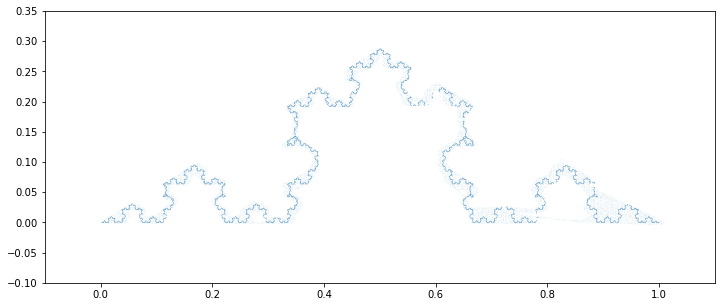

In [59]:
plot(-0.1,  1.1, 
     -0.1,  0.35,
     12,    5,
     to_plot[:,0], to_plot[:,1])

Compared to the| original curve.

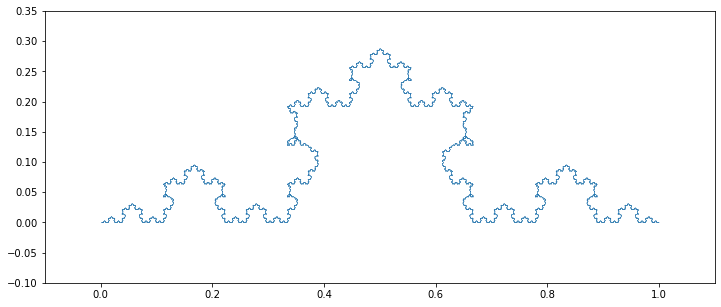

In [58]:
plot(-0.1, 1.1, 
     -0.1, 0.35,
     12, 5,
     X1[:,0],X1[:,1])

In [ ]:
#plt.savefig('3_0.png')

### Possible data "leakage".